## Project Twitter US Airline Sentiment

### 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

#### Importing libraries

In [71]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv, re, contractions, nltk, unicodedata
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

#### Loading the data set

In [72]:
data = pd.read_csv("C:/Users/Victor/Downloads/Tweets.csv")

#### Checking shape of data

In [73]:
print(data.shape)

(14640, 15)


#### Checking data description

In [74]:
data.columns.values

array(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], dtype=object)

### 2. Understand of data-columns:

#### Listing column names:

In [75]:
for col_names in data.columns: 
    print(col_names)

tweet_id
airline_sentiment
airline_sentiment_confidence
negativereason
negativereason_confidence
airline
airline_sentiment_gold
name
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone


#### Drop all other columns except “text” and “airline_sentiment”.

In [76]:
ndata=data.drop(columns=['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence',
                   'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 
                   'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'])

#### Check the shape of data.

In [77]:
ndata.shape

(14640, 2)

#### Print first 5 rows of data.

In [78]:
ndata.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### 3. Text pre-processing: Data preparation.

#### HTML tags removal

In [79]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

ndata['text'] = ndata['text'].apply(lambda x: strip_html(x))
ndata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


#### Remove numbers

In [80]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

ndata['text'] = ndata['text'].apply(lambda x: remove_numbers(x))
ndata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


#### Tokenization

In [81]:
ndata['text'] = ndata.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
ndata

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."
...,...,...
14635,positive,"[@, AmericanAir, thank, you, we, got, on, a, d..."
14636,negative,"[@, AmericanAir, leaving, over, minutes, Late,..."
14637,neutral,"[@, AmericanAir, Please, bring, American, Airl..."
14638,negative,"[@, AmericanAir, you, have, my, money, ,, you,..."


#### Lemmatization

In [82]:
lemmatizer = WordNetLemmatizer()

# Removing non_ascii characters
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# Converting to lower case
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Lemmatizing words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

# Joining the words to convert them back to text string in the dataframe.
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = lemmatize_list(words)
    return ''.join(words)

# Normalizing and displaying the data
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@virginamerica what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@virginamerica i didn't today... must mean i n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@virginamerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### Vectorization

In [83]:
vectorizer = CountVectorizer(max_features=100)
data_features = vectorizer.fit_transform(data['text'])
data_features = data_features.toarray()
data_features.shape

(14640, 100)

#### Split data into training and testing set.

In [85]:
labels = data['airline_sentiment_confidence']
labels = labels.astype('int')

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

#### Calculating cross validation

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=12, n_jobs=6)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=12, n_jobs=6)
0.6387295081967214


#### Printing confusion matix

[[ 307  954]
 [ 491 2640]]


<AxesSubplot:>

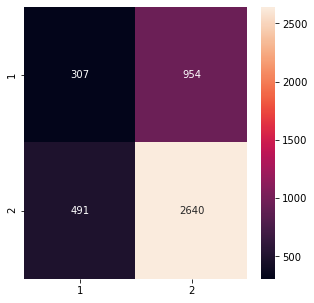

In [88]:
result = forest.predict(X_test)
confmat = confusion_matrix(y_test, result)
print(confmat)
df_cm = pd.DataFrame(confmat, index = [i for i in "12"],
                  columns = [i for i in "12"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Applying TfidfVectorizer to convert text data to numbers.

In [89]:
vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])
data_features = data_features.toarray()
data_features.shape

(14640, 1000)

#### Applying Random Forest for classification of reviews.

In [90]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.662363387978142


#### Printing new confusion matrix

[[ 307  954]
 [ 491 2640]]


<AxesSubplot:>

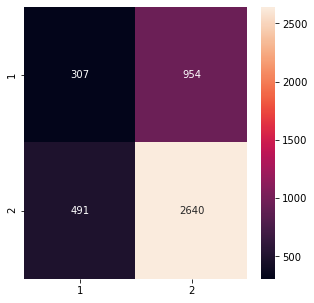

In [91]:
result = forest.predict(X_test)
conf_mat = confusion_matrix(y_test, result)
print(confmat)
df_cm = pd.DataFrame(confmat, index = [i for i in "12"],
                  columns = [i for i in "12"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, fmt='g')

Conclusions:

- We were able to implement various preprocessing techniques like non-ascii characters removal and converting to lower case
- We were able to vectorize the data and create a model using Random forest Classification
- We used the total 14640 records
- We got a slight improvement by using TfidfVectorizer, the model improved from 63% to 66%